# Multiple Linear Regression
This time, we test what happens to our model quality, when we are including ALL variables.

<hr>

## Importing packages and reading the data ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import sklearn.metrics as metrics
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

customers = pd.read_csv("../datasets/MLR_Ecommerce_Customers.csv")

In [2]:
customers = customers[['Avg. Session Length',
                       'Time on App',
                       'Time on Website',
                       'Length of Membership',
                       'Yearly Amount Spent']]

In [3]:
customers.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


Sometimes a correlation matrix with several variables can be hard to read. In this case it helps, if we **filter** our data as we only want to look at the stronger correlationships.

In [4]:
# filter the correlation matrix to show only (absolute) values above 0.4
corr_matrix = customers.corr().abs()
filtered_matrix = corr_matrix[corr_matrix > 0.4]
filtered_matrix


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.0,NaN,NaN,NaN,NaN
Time on App,NaN,1.000000,NaN,NaN,0.499328
Time on Website,NaN,NaN,1.0,NaN,NaN
Length of Membership,NaN,NaN,NaN,1.000000,0.809084
Yearly Amount Spent,NaN,0.499328,NaN,0.809084,1.000000


The correlation matrix suggests that there is a relationship between ***Yearly Amount Spent*** and ***Length of Membership***. 
Similarly, the correlation matrix suggests that there is a relationship between ***Yearly Amount Spent*** and ***Time on App***. If we can confirm this suspicion, then we could work with our product development team on ways to boost our revenues!

Text(0, 0.5, 'Yearly Amount Spent')

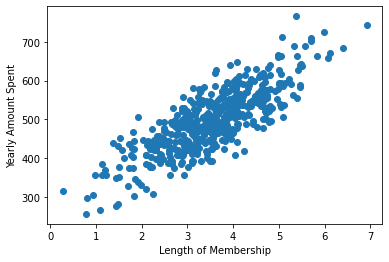

In [5]:
plt.scatter(customers['Length of Membership'], customers['Yearly Amount Spent'])
plt.xlabel("Length of Membership")
plt.ylabel("Yearly Amount Spent")

Text(0, 0.5, 'Yearly Amount Spent')

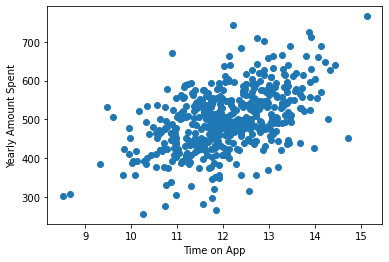

In [6]:
plt.scatter(customers['Time on App'], customers['Yearly Amount Spent'])
plt.xlabel("Time on App")
plt.ylabel("Yearly Amount Spent")

## Split the DataFrame into train and test data

In [7]:
train, test = train_test_split(
    customers,
    random_state = 13 # this ensures that we get the same answer each time
)

## Train the model

In [8]:
# Identify dependent and independent variables

dependent_var = train['Yearly Amount Spent']
independent_var = train[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
independent_var = sm.add_constant(independent_var)

# Build the model 
model = sm.OLS(
    dependent_var,
    independent_var
).fit()


### Is the model 'a good fit'? ###
To understand if a model can be used to make a prediction we need to look at additional elements of the OLS Regression results: <br>

- **p-value**\
A p-value < 0.05 suggests that our data is statistically significant and that the values for our variable cannot be explained by mere coincidence. It helps us to identify which independent variables have a significant effect on the dependent variable. 


- **R-squared**\
R-squared tells us how closely the data fits the model between 0 (terrible fit) and 1 (perfect fit). In our case, 87.9\% is high.\
In good real world examples - you can expect to achieve closer to 30\%. \
\
30\% is usually sufficient because we are not trying to describe exactly the dependent variable (since we don’t have all the data), we just want to give an estimate as to what might happen under small changes. Despite not describing everything, the model still has practical use!

- **Adjusted R-squared**\
Adjusted R-squared is similar to the R-squared but is for models with more than 1 independent variable. 

- **F-Statistic**\
F-statistic is a test to compare two models. In this case, it is comparing our regression model to the base model (taking the mean).\
A high F value (> 1) means that the new model is better. A low F value (< 1) means that the old model is better.

- **Prob F-Statistic**\
Prob (F-Statistic) tells us how statistically significant this value is. The lower the probability, the more significant the difference between models. In our case, our regression model is MUCH better than the base model in a statistically significant way.

In [9]:
predicted = model.predict(
    sm.add_constant(test[['Time on App','Length of Membership']])
)

ValueError: shapes (125,3) and (5,) not aligned: 3 (dim 1) != 5 (dim 0)

In [ ]:
predicted

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     5778.
Date:                 Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                         09:52:20   Log-Likelihood:                -1397.7
No. Observations:                  375   AIC:                             2805.
Df Residuals:                      370   BIC:                             2825.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1049.4033     26.770    -39.201      0.000   -1102.044    -996.763
Avg. Session Length     25.6504      0.519     49.467      0.000      24.631      26.670
Time on App             38.8441      0.528     73.511      0.000      37.805      39.883
Time on Website          0.3966      0.515      0.769      0.442      -0.617       1.410
Length of Membership    61.7447      0.535    115.397      0.000      60.693      62.797
==============================================================================
Omnibus:                        1.001   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.606   Jarque-Bera (JB):                0.768
Skew:                          -0.053   Prob(JB):                        0.681
Kurtosis:                       3.195   Cond. No.                     2.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interpretation of the model

It is always useful to check all the main statistic metrics and the notes in the model as well!
At first the R-squared value (0.984), the Adjusted R-squared value (0.984) and The F-statistic (5778) suggest this is a good model.
However, there are some potential issues with the model if we are using all variables here: 
- The **p-value** for "Time on Website" is 0.442\
This is not statistically significant at the usual significance level of lower than 0.05 and suggests that "Time on Website" may not be a significant predictor of "Yearly Amount Spent." 
- Additionally, the **high condition number** (2.62e+03) suggests that there may be issues with **multicollinearity** among the independent variables. This means that the independent variables may be highly correlated with each other, which can lead to unreliable coefficient estimates and less accurate predictions.


